# Generate multidimensional meaning spaces

The basic idea is to simulate $n-ball$ meaning spaces by choosing $n$ points from an interval (radius), e.g. [0,1]. Due to the curse of dimensionality, it is computationally expensive to uniformly fill higher-dimensional n-balls, so we will stick with 2 and 3d spheres. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

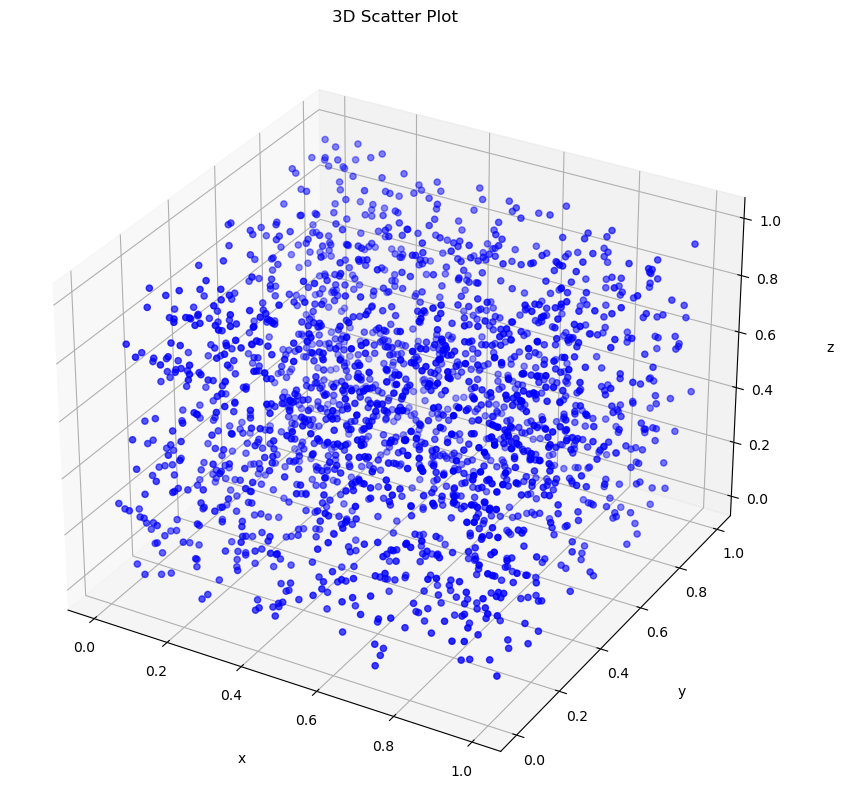

In [3]:
# First, generate and visualize a cube
num_points = 2000

x = np.random.random(num_points)
y = np.random.random(num_points)
z = np.random.random(num_points)

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

ax.scatter(x, y, z, c = 'b',)
ax.set_title('3D Scatter Plot')

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

plt.show()

In [4]:
def rand_sign():
   return np.random.choice([1, -1])

def sample():
   a = 0 + 1e-4
   b = 1 + 1e-4
   return rand_sign() * (b - a) * np.random.sample() + a

def get_r3_point():
    x_1 = sample()
    x_2 = sample()
    x_3 = np.sqrt( np.sqrt(1 + 1e-4) - x_1**2 - x_2**2)
    x_3 *= rand_sign()  
    while np.isnan(x_3): # sometimes 1 - rest < 0
        x_1 = sample()
        x_2 = sample()
        x_3 = np.sqrt( np.sqrt(1 + 1e-4) - x_1**2 - x_2**2)
        sign = np.random.choice([1, -1]) # "
        x_3 *= rand_sign()
    return np.array([x_1, x_2, x_3])

def get_r2_point():
    x_1 = sample()
    x_2 = np.sqrt( 1 - x_1**2 )
    x_2 *= rand_sign()
    while np.isnan(x_2):
        x_1 = sample()
        x_2 = np.sqrt( 1 - x_1**2 )
        x_2 *= rand_sign()
    return np.array([x_1, x_2])

rand_ind = lambda n: np.random.choice(n)

def get_2ball(num_points):
    # points = np.array([get_r3_point() for _ in range(num_points)])

    num_points = int(num_points/2)
    surface_points = np.array([get_r3_point() for _ in range(num_points)])
    midpoints = np.array([ (surface_points[rand_ind(num_points)] + surface_points[rand_ind(num_points)])/2 for _ in range(num_points) ])
    points = np.vstack([surface_points, midpoints])    

    return points


/var/folders/3z/q1pyp9n929z2nh_1_69s7y_40000gn/T/ipykernel_94995/1997174765.py:12: RuntimeWarning: invalid value encountered in sqrt
  x_3 = np.sqrt( np.sqrt(1 + 1e-4) - x_1**2 - x_2**2)
/var/folders/3z/q1pyp9n929z2nh_1_69s7y_40000gn/T/ipykernel_94995/1997174765.py:17: RuntimeWarning: invalid value encountered in sqrt
  x_3 = np.sqrt( np.sqrt(1 + 1e-4) - x_1**2 - x_2**2)


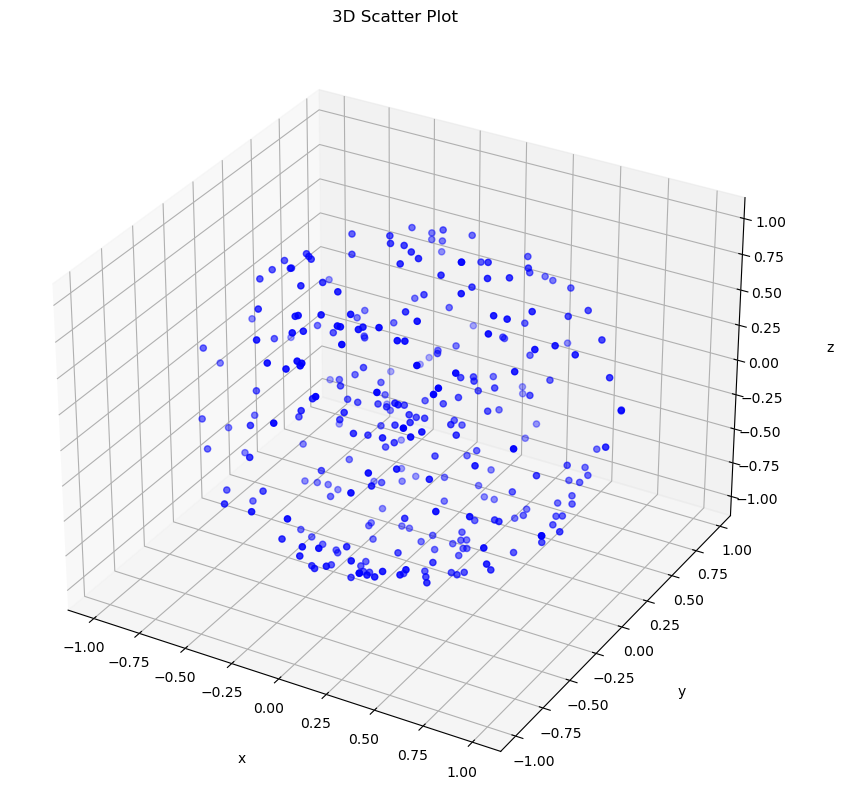

In [14]:
num_points = 200

points = get_2ball(200)

x = points[:,0]
y = points[:,1]
z = points[:,2]

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

ax.scatter(x, y, z, c = 'b',)
ax.set_title('3D Scatter Plot')

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

plt.show()

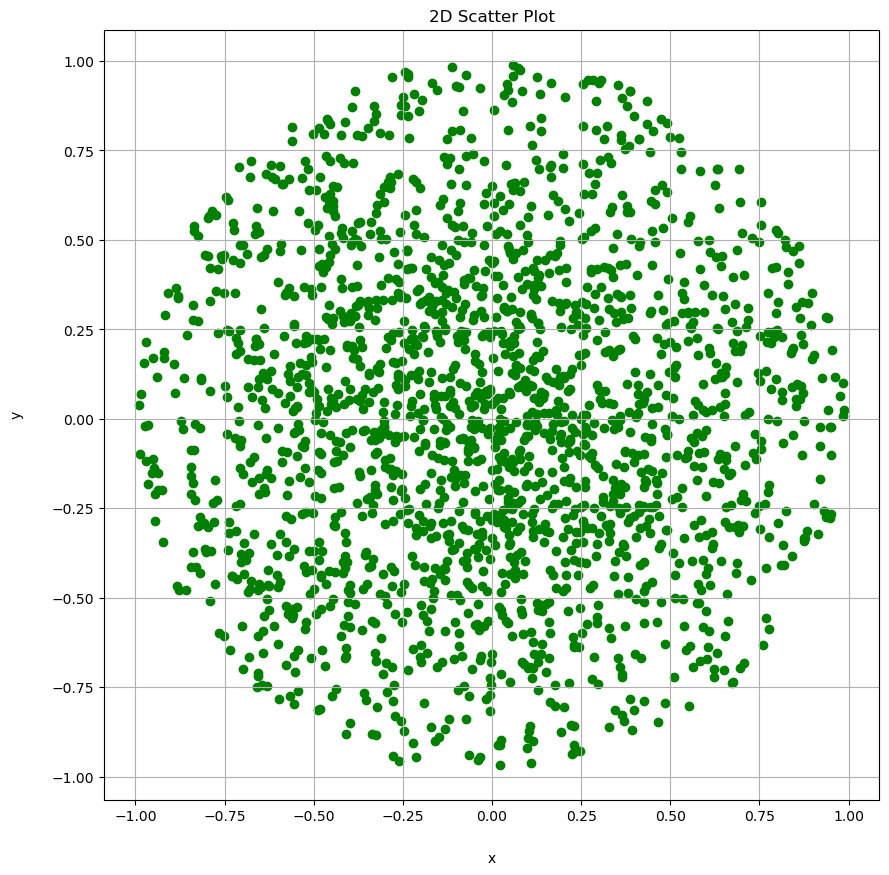

In [6]:
# num_points = 1000
# points = np.array([get_r2_point() for _ in range(num_points)])

x = points[:,0]
y = points[:,1]

fig = plt.figure(figsize = (10,10))
ax = plt.axes()
ax.grid()

ax.scatter(x, y, c = 'g',)
ax.set_title('2D Scatter Plot')

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
plt.show()

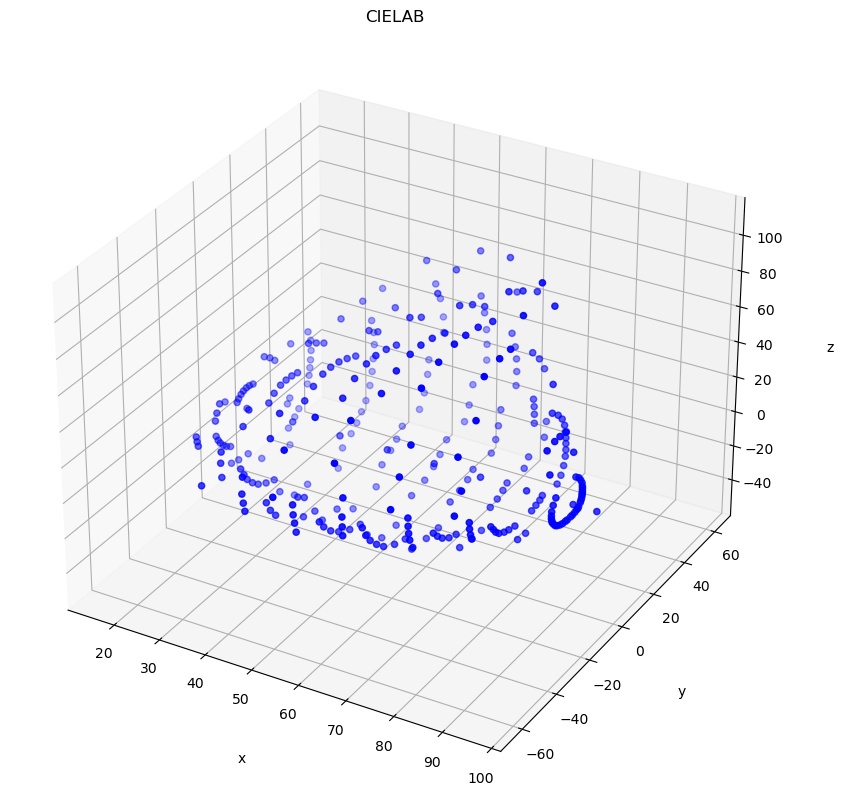

In [7]:
# visualize CIELAB

import pandas as pd
fn = "cnum-vhcm-lab-new.txt"
data = pd.read_csv(fn, sep="\t")
points = data[["L*","a*","b*"]].to_numpy()

x = points[:,0]
y = points[:,1]
z = points[:,2]

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

ax.scatter(x, y, z, c = 'b',)
ax.set_title('CIELAB')

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

plt.show()

While CIELAB, and probably other semantic domains, have interesting degrees of naturalness (e.g. this is an irregular but mostly convex solid), we will abstract away from some of these interesting details and focus on more regular spaces (i.e., spheres, circles, cubes). 

## Generate meaning spaces for simulations

In [15]:
ball_3d = get_2ball(300)
ball_2d = get_2ball(200)[:,1:]

/var/folders/3z/q1pyp9n929z2nh_1_69s7y_40000gn/T/ipykernel_94995/1997174765.py:12: RuntimeWarning: invalid value encountered in sqrt
  x_3 = np.sqrt( np.sqrt(1 + 1e-4) - x_1**2 - x_2**2)
/var/folders/3z/q1pyp9n929z2nh_1_69s7y_40000gn/T/ipykernel_94995/1997174765.py:17: RuntimeWarning: invalid value encountered in sqrt
  x_3 = np.sqrt( np.sqrt(1 + 1e-4) - x_1**2 - x_2**2)


In [16]:
df_ball_2d = pd.DataFrame(list(range(200)), columns=["name"])
df_ball_2d = pd.DataFrame(ball_2d, columns=["x", "y"])
df_ball_2d["name"] = df_ball_2d.index
df_ball_2d

,x,y,name
0,-0.734686,0.555080,0
1,0.626819,0.601575,1
2,0.728961,0.338453,2
3,-0.298582,0.607649,3
4,-0.111037,0.770906,4
...,...,...,...
195,-0.534535,-0.148598,195
196,0.125260,0.024175,196
197,-0.301043,-0.025829,197
198,-0.923244,0.369148,198


In [10]:
df_ball_3d = pd.DataFrame(list(range(300)), columns=["name"])
df_ball_3d = pd.DataFrame(ball_3d, columns=["x", "y", "z"])
df_ball_3d["name"] = df_ball_3d.index
df_ball_3d

,x,y,z,name
0,-0.190678,-0.209778,0.959002,0
1,-0.267256,-0.125497,-0.955445,1
2,-0.597980,-0.655167,0.461764,2
3,-0.320945,0.013834,-0.947023,3
4,0.860727,-0.171304,-0.479431,4
...,...,...,...,...
195,0.020234,0.283101,0.820269,195
196,0.387833,0.011242,0.124310,196
197,-0.060717,0.326034,-0.067961,197
198,0.159735,-0.130733,-0.011398,198


In [12]:
# save
df_ball_2d.to_csv("2ball.csv")
df_ball_3d.to_csv("3ball.csv")